Project ka flow:

**Phase 1: Environment Setup**
0.   Google Colab setup, set runtime to T4 GPU, Drive mount
1.   Yolov7 Github clone
2.   Installation of Yolov7 and dependencies


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content
!git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7


/content
fatal: destination path 'yolov7' already exists and is not an empty directory.
/content/yolov7
/content
fatal: destination path 'yolov7' already exists and is not an empty directory.
/content/yolov7


In [ ]:
!pip install -r requirements.txt


**Phase 2: Dataset Preparation**
3. Upload & Extract: zip to unzip (rar will not work)
zip dataset file to upload krdi hai drive me.


4. Format Conversion: from COCO to YOLO format (.json to .txt)
5. Yaml File Creation: create data.yaml file,



In [ ]:
import zipfile
zip_path = "/content/drive/MyDrive/graymatics/graymatics_dataset.zip"
extract_to = "/content/graymatics_dataset"

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_to)


In [ ]:
import os

for root, dirs, files in os.walk("/content/graymatics_dataset"):
    print(f"\n {root}")
    for name in files:
        if name.endswith(".json"):
            print(f"    {name}")



📁 /content/graymatics_dataset

📁 /content/graymatics_dataset/yolov7_format

📁 /content/graymatics_dataset/yolov7_format/images

📁 /content/graymatics_dataset/yolov7_format/images/train

📁 /content/graymatics_dataset/yolov7_format/images/valid

📁 /content/graymatics_dataset/yolov7_format/labels

📁 /content/graymatics_dataset/yolov7_format/labels/train

📁 /content/graymatics_dataset/yolov7_format/labels/valid

📁 /content/graymatics_dataset/graymatics_interview_train_dataset

📁 /content/graymatics_dataset/graymatics_interview_train_dataset/train
   📄 _annotations.coco.json

📁 /content/graymatics_dataset/graymatics_interview_train_dataset/labels

📁 /content/graymatics_dataset/graymatics_interview_train_dataset/labels/train

📁 /content/graymatics_dataset/graymatics_interview_train_dataset/labels/test

📁 /content/graymatics_dataset/graymatics_interview_train_dataset/labels/valid

📁 /content/graymatics_dataset/graymatics_interview_train_dataset/test
   📄 _annotations.coco.json

📁 /content/gr

In [ ]:
import os
import json

def convert_coco_to_yolo(coco_json_path, output_folder):
    with open(coco_json_path) as f:
        data = json.load(f)

    images = {img['id']: img for img in data['images']}
    categories = {cat['id']: i for i, cat in enumerate(data['categories'])}
    annotations = data['annotations']

    os.makedirs(output_folder, exist_ok=True)
    label_dict = {}

    for ann in annotations:
        img_id = ann['image_id']
        image = images[img_id]
        file_name = os.path.splitext(image['file_name'])[0]
        w, h = image['width'], image['height']
        cat_id = ann['category_id']
        bbox = ann['bbox']  # [x, y, width, height]

        x_center = (bbox[0] + bbox[2] / 2) / w
        y_center = (bbox[1] + bbox[3] / 2) / h
        bw = bbox[2] / w
        bh = bbox[3] / h

        line = f"{categories[cat_id]} {x_center:.6f} {y_center:.6f} {bw:.6f} {bh:.6f}"
        label_dict.setdefault(file_name, []).append(line)

    for fname, lines in label_dict.items():
        with open(os.path.join(output_folder, f"{fname}.txt"), 'w') as f:
            f.write('\n'.join(lines))

    print(f"YOLO labels saved to: {output_folder}")


In [ ]:
# TRAIN
convert_coco_to_yolo(
    "/content/graymatics_dataset/graymatics_interview_train_dataset/train/_annotations.coco.json",
    "/content/graymatics_dataset/graymatics_interview_train_dataset/labels/train"
)

# VALID
convert_coco_to_yolo(
    "/content/graymatics_dataset/graymatics_interview_train_dataset/valid/_annotations.coco.json",
    "/content/graymatics_dataset/graymatics_interview_train_dataset/labels/valid"
)

# TEST (Test ke annotations ko chnge krna to required nhi hai but kr dete hai lage hath)
convert_coco_to_yolo(
    "/content/graymatics_dataset/graymatics_interview_train_dataset/test/_annotations.coco.json",
    "/content/graymatics_dataset/graymatics_interview_train_dataset/labels/test"
)


✅ YOLO labels saved to: /content/graymatics_dataset/graymatics_interview_train_dataset/labels/train
✅ YOLO labels saved to: /content/graymatics_dataset/graymatics_interview_train_dataset/labels/valid
✅ YOLO labels saved to: /content/graymatics_dataset/graymatics_interview_train_dataset/labels/test
✅ YOLO labels saved to: /content/graymatics_dataset/graymatics_interview_train_dataset/labels/train
✅ YOLO labels saved to: /content/graymatics_dataset/graymatics_interview_train_dataset/labels/valid
✅ YOLO labels saved to: /content/graymatics_dataset/graymatics_interview_train_dataset/labels/test


In [ ]:
yaml_path = "/content/drive/MyDrive/graymatics/data.yaml"

yaml_content = """
train: /content/graymatics_dataset/graymatics_interview_train_dataset/train
val: /content/graymatics_dataset/graymatics_interview_train_dataset/valid

nc: 2
names: ['1', 'pepperonipizza']
"""

with open(yaml_path, "w") as f:
    f.write(yaml_content.strip())

print(f"data.yaml saved to: {yaml_path}")


✅ data.yaml saved to: /content/drive/MyDrive/graymatics/data.yaml
✅ data.yaml saved to: /content/drive/MyDrive/graymatics/data.yaml


**Phase 3: Model Configuration**
6. Choose config file



**Phase 4: Training Model**
7. using training command



In [ ]:
!pip uninstall -y tensorflow jax jaxlib
# clash ho rha tha pytorch aur tensorflow me

In [ ]:
# stable version install krne ke liye pehle current version uninstall krte hai
!pip uninstall -y torch torchvision torchaudio
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2

Found existing installation: torch 2.0.1
Uninstalling torch-2.0.1:
  Successfully uninstalled torch-2.0.1
Found existing installation: torchvision 0.15.2
Uninstalling torchvision-0.15.2:
  Successfully uninstalled torchvision-0.15.2
Found existing installation: torchaudio 2.0.2
Uninstalling torchaudio-2.0.2:
  Successfully uninstalled torchaudio-2.0.2
  Using cached torch-2.0.1-cp311-cp311-manylinux1_x86_64.whl.metadata (24 kB)
  Using cached torchvision-0.15.2-cp311-cp311-manylinux1_x86_64.whl.metadata (11 kB)
  Using cached torchaudio-2.0.2-cp311-cp311-manylinux1_x86_64.whl.metadata (1.2 kB)
Using cached torch-2.0.1-cp311-cp311-manylinux1_x86_64.whl (619.9 MB)
Using cached torchvision-0.15.2-cp311-cp311-manylinux1_x86_64.whl (6.0 MB)
Using cached torchaudio-2.0.2-cp311-cp311-manylinux1_x86_64.whl (4.4 MB)
Found existing installation: torch 2.0.1
Uninstalling torch-2.0.1:
  Successfully uninstalled torch-2.0.1
Found existing installation: torchvision 0.15.2
Uninstalling torchvision-0.

In [ ]:
import os
import shutil

base = "/content/graymatics_dataset/graymatics_interview_train_dataset"
new_base = "/content/graymatics_dataset/yolov7_format"

# YOLOv7 ka structure
for split in ['train', 'valid']:
    os.makedirs(f"{new_base}/images/{split}", exist_ok=True)
    os.makedirs(f"{new_base}/labels/{split}", exist_ok=True)

    # Move images
    image_folder = os.path.join(base, split)
    for file in os.listdir(image_folder):
        if file.endswith(".jpg") or file.endswith(".png"):
            shutil.copy(os.path.join(image_folder, file), f"{new_base}/images/{split}/")

    # Move labels
    label_folder = os.path.join(base, f"labels/{split}")
    for file in os.listdir(label_folder):
        if file.endswith(".txt"):
            shutil.copy(os.path.join(label_folder, file), f"{new_base}/labels/{split}/")


In [ ]:
yaml_path = "/content/drive/MyDrive/graymatics/data.yaml"

yaml_content = """
train: /content/graymatics_dataset/yolov7_format/images/train
val: /content/graymatics_dataset/yolov7_format/images/valid

nc: 2
names: ['1', 'pepperonipizza']
"""

with open(yaml_path, "w") as f:
    f.write(yaml_content.strip())

print(f"Updated data.yaml saved to: {yaml_path}")


✅ Updated data.yaml saved to: /content/drive/MyDrive/graymatics/data.yaml
✅ Updated data.yaml saved to: /content/drive/MyDrive/graymatics/data.yaml


In [ ]:
%cd /content/yolov7

!python train.py --img 640 --batch 16 --epochs 25 \
--data /content/drive/MyDrive/graymatics/data.yaml \
--cfg cfg/training/yolov7.yaml \
--weights yolov7.pt \
--name graymatics_pizza


/content/yolov7
YOLOR 🚀 v0.1-128-ga207844 torch 2.0.1+cu117 CUDA:0 (Tesla T4, 15095.0625MB)

Namespace(weights='yolov7.pt', cfg='cfg/training/yolov7.yaml', data='/content/drive/MyDrive/graymatics/data.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=25, batch_size=16, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='graymatics_pizza', exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias='latest', freeze=[0], v5_metric=False, world_size=1, global_rank=-1, save_dir='runs/train/graymatics_pizza4', total_batch_size=16)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, we

**Phase 5: Evaluation and Inference**
8. Training logs and results
9. Inference Video
10. Trim video to 1 min.

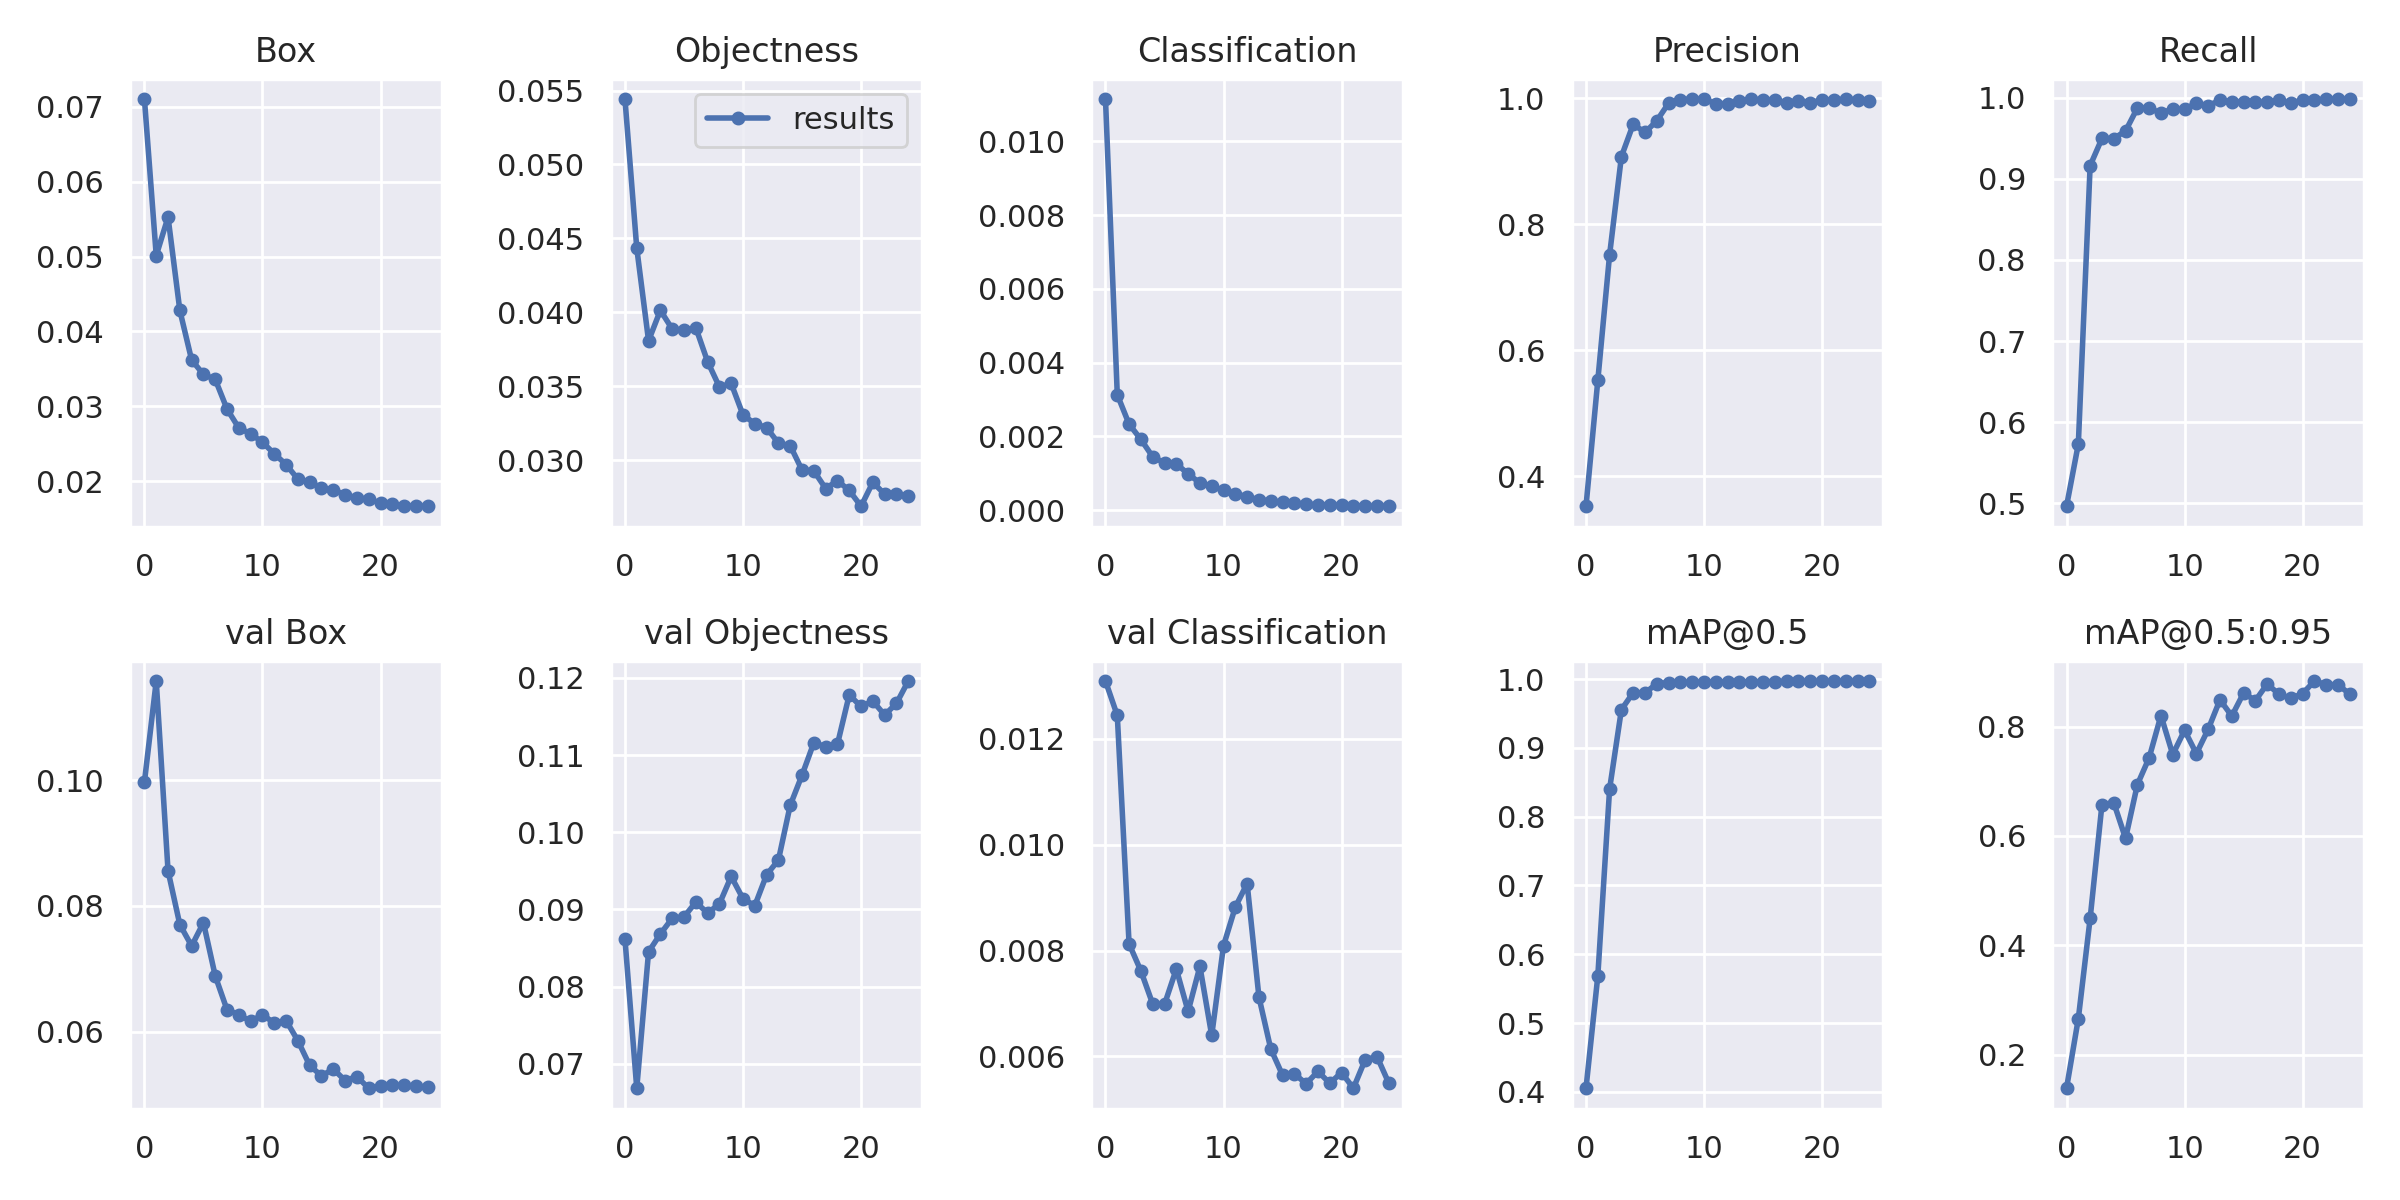

In [ ]:
from IPython.display import Image
Image(filename='runs/train/graymatics_pizza4/results.png', width=800)


In [ ]:
!pip install -q yt-dlp
!yt-dlp -f mp4 "https://www.youtube.com/watch?v=5lKsyMu6pAk" -o sample_video.mp4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.3/174.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 68.8 MB/s eta 0:00:00
[youtube] Extracting URL: https://www.youtube.com/watch?v=5lKsyMu6pAk
[youtube] 5lKsyMu6pAk: Downloading webpage
[youtube] 5lKsyMu6pAk: Downloading tv client config
[youtube] 5lKsyMu6pAk: Downloading player 69b31e11-main
[youtube] 5lKsyMu6pAk: Downloading tv player API JSON
[youtube] 5lKsyMu6pAk: Downloading ios player API JSON
[youtube] 5lKsyMu6pAk: Downloading m3u8 information
[info] 5lKsyMu6pAk: Downloading 1 format(s): 18
[download] Destination: sample_video.mp4
[download] 100% of   51.48MiB in 00:00:02 at 18.26MiB/s


In [ ]:
!python detect.py --weights runs/train/graymatics_pizza4/weights/best.pt \
--conf 0.25 \
--img-size 640 \
--source sample_video.mp4


Streaming output truncated to the last 5000 lines.
video 1/1 (14355/19353) /content/yolov7/sample_video.mp4: Done. (9.2ms) Inference, (0.2ms) NMS
video 1/1 (14356/19353) /content/yolov7/sample_video.mp4: Done. (9.2ms) Inference, (0.2ms) NMS
video 1/1 (14357/19353) /content/yolov7/sample_video.mp4: Done. (9.2ms) Inference, (0.2ms) NMS
video 1/1 (14358/19353) /content/yolov7/sample_video.mp4: Done. (9.1ms) Inference, (0.2ms) NMS
video 1/1 (14359/19353) /content/yolov7/sample_video.mp4: Done. (9.1ms) Inference, (0.2ms) NMS
video 1/1 (14360/19353) /content/yolov7/sample_video.mp4: Done. (9.1ms) Inference, (0.2ms) NMS
video 1/1 (14361/19353) /content/yolov7/sample_video.mp4: Done. (9.1ms) Inference, (0.2ms) NMS
video 1/1 (14362/19353) /content/yolov7/sample_video.mp4: Done. (9.3ms) Inference, (0.2ms) NMS
video 1/1 (14363/19353) /content/yolov7/sample_video.mp4: Done. (9.2ms) Inference, (0.2ms) NMS
video 1/1 (14364/19353) /content/yolov7/sample_video.mp4: Done. (9.2ms) Inference, (0.3ms) NMS

In [ ]:
from IPython.display import Video

Video("/content/yolov7/runs/detect/exp/output_video.mp4", embed=True)


Buffered data was truncated after reaching the output size limit.

In [ ]:
!ls /content/yolov7/runs/detect/


exp


In [ ]:
from google.colab import files
files.download('/content/yolov7/runs/detect/exp/output_video.mp4')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>